In [391]:
import pandas as pd
from pandas import read_csv, DataFrame
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import chi2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from patsy import dmatrix


In [392]:
# df = read_csv('tyg3.csv')
# df.head()

df = pd.read_excel('mau.xlsx')
df.head()

,gender,age,Hypertension_Comorbidities,Type_2_Diabetes,sepsis,AKI,WBC,RBC,RDW,hemoglobin,...,ALP,AST,PTT,PT,INR,survival_time_28,survival_time_90,status,status_90,TyG
0,F,53,0,1,0,0,3.7,3.28,13.9,9.1,...,93,30.0,23.5,13.9,1.3,28,90,0,0,8.69
1,M,46,1,1,0,0,15.2,3.53,15.2,10.3,...,50,14.0,27.7,13.3,1.2,28,90,0,0,10.01
2,M,56,0,0,1,1,7.3,3.12,15.3,8.9,...,134,110.0,29.9,16.6,1.5,28,90,0,0,9.93
3,M,32,0,0,0,0,13.3,4.19,14.0,12.9,...,50,51.0,27.3,15.1,1.3,28,90,0,0,8.46
4,F,60,1,0,0,0,9.1,3.51,14.8,9.1,...,145,17.0,28.3,11.3,1.0,28,90,0,0,8.01


In [393]:
model_linear = smf.glm(formula='sepsis ~ TyG', data=df, family = sm.families.Binomial())
result_linear = model_linear.fit()
result_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                  661
Model:                            GLM   Df Residuals:                      659
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -404.61
Date:                Fri, 28 Nov 2025   Deviance:                       809.21
Time:                        12:21:05   Pearson chi2:                     659.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06226
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.7436      0.977     -6.906      0.000      -8.658      -4.830
TyG            0.6682      0.106      6.310      0.000       0.461       0.876
==============================================================================
"""

In [394]:
n_knof = 3
model_spline = smf.glm(formula=f'sepsis ~ bs(TyG, df = {n_knof}, include_intercept = False)', data=df, family=sm.families.Binomial())
result_spline = model_spline.fit()
result_spline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 sepsis   No. Observations:                  661
Model:                            GLM   Df Residuals:                      657
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -402.07
Date:                Fri, 28 Nov 2025   Deviance:                       804.13
Time:                        12:21:05   Pearson chi2:                     664.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06944
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.9244      1.487     -0.622      0.534      -3.839       1.990
bs(TyG, df=3, include_intercept=False)[0]    -2.6752      2.652     -1.009      0.313      -7.873       2.522
bs(TyG, df=3, include_intercept=False)[1]     2.3401      1.193      1.962      0.050       0.003       4.678
bs(TyG, df=3, include_intercept=False)[2]     0.7272      1.633      0.445      0.656      -2.474       3.928
=============================================================================================================
"""

In [395]:
LR = 2 * (result_spline.llf - result_linear.llf)
df_diff = result_spline.df_model - result_linear.df_model
p_nonlinear = chi2.sf(LR, df_diff)
p_nonlinear

0.07899545886565887

In [396]:
def format_p(p):
    if p < 0.001:
        return 'p<0.001'
    return f'{p:.3f}'

In [397]:
# mortalities = ['mortality_7d', 'mortality_28d', 'mortality_90d', 'mortality_1y']
# fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(25, 18))
# axes = axes.flatten()
# n_knof = 3
# for i in range(4):
#     model_linear = smf.glm(formula = f'{mortalities[i]} ~ tyg', data=df, family = sm.families.Binomial())
#     result_linear = model_linear.fit()
#     model_spline = smf.glm(formula = f'{mortalities[i]} ~ bs(tyg, df = {n_knof}, include_intercept = False)', data=df, family=sm.families.Binomial())
#     result_spline = model_spline.fit()
#     LR = 2 * (result_spline.llf - result_linear.llf)
#     df_diff = result_spline.df_model - result_linear.df_model
#     p_nonlinear = chi2.sf(LR, df_diff)

#     x_pred = DataFrame(data = {'tyg': np.linspace(df['tyg'].min(), df['tyg'].max(), 100)})
#     result_pred = result_spline.get_prediction(x_pred)
#     pred_mean = result_pred.predicted_mean
#     ci = result_pred.conf_int()
#     ax = axes[i]
#     ax.plot(x_pred, pred_mean, label="Fitted", color='red')
#     ax.fill_between(x_pred['tyg'].values, ci[:,0], ci[:,1], color='red', alpha=0.2)

#     ax.axhline(y=0.5, color='black', linestyle='--', linewidth=0.8)
    
#     ax.axvline(x=df["tyg"].median(), color='gray', linestyle='--', linewidth=0.7)

#     # Add histogram
#     ax2 = ax.twinx()
#     sns.histplot(df["tyg"], ax=ax2, bins=40, color='blue', alpha=0.3, stat="density")
#     ax2.set_yticks([])

#     # Set labels
#     ax.set_xlabel("NPAR")
#     ax.set_ylabel(f"{mortalities[i]} days probability")
#     ax.set_title(f"Logistic Regression {mortalities[i]}")
#     text = f"P-nonlinear {format_p(p_nonlinear)}"
#     ax.text(0.98, 0.90, text, transform=ax.transAxes, ha='right', va='top', fontsize=12, bbox=dict(facecolor='white', alpha=0.7, edgecolor='black'))
    

# plt.show()


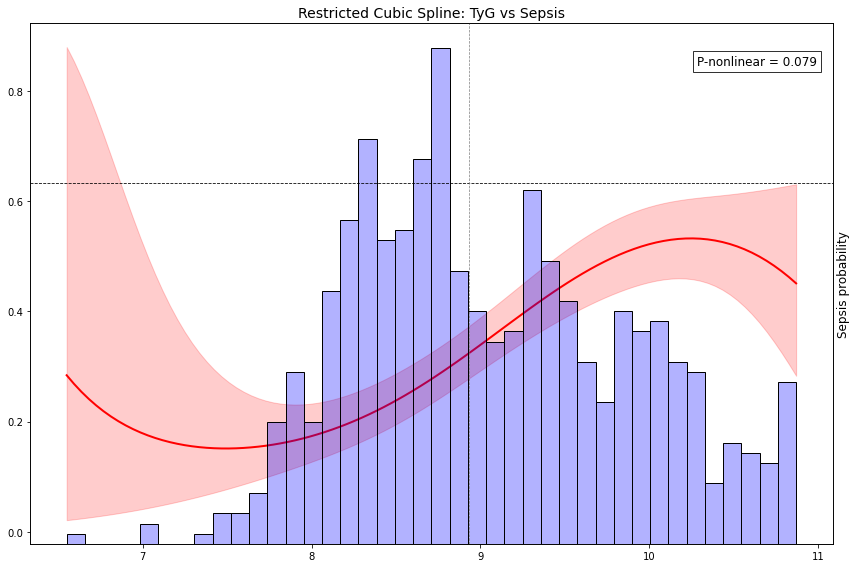

In [398]:
# 4) Tạo dữ liệu dự đoán
# -------------------------
x_pred = pd.DataFrame({ "TyG": np.linspace(df["TyG"].min(), df["TyG"].max(), 100)})
result_pred = result_spline.get_prediction(x_pred)
pred_mean = result_pred.predicted_mean
ci = result_pred.conf_int()

# -------------------------
# 5) Vẽ biểu đồ RCS
# -------------------------
plt.figure(figsize=(12, 8))

# Đường fitted spline
plt.plot(x_pred["TyG"], pred_mean, color="red", linewidth=2, label="Spline fitted")

# Dải CI
plt.fill_between(x_pred["TyG"], ci[:, 0], ci[:, 1], color="red", alpha=0.2)

# Histogram phân bố TyG
ax2 = plt.twinx()
sns.histplot(df["TyG"], bins=40, color="blue", alpha=0.3, stat="density", ax=ax2)
ax2.set_yticks([])

# Các chi tiết
plt.axhline(y=0.5, color="black", linestyle="--", linewidth=0.8)
plt.axvline(x=df["TyG"].median(), color="gray", linestyle="--", linewidth=0.7)

plt.xlabel("TyG index", fontsize=12)
plt.ylabel("Sepsis probability", fontsize=12)
plt.title("Restricted Cubic Spline: TyG vs Sepsis", fontsize=14)

# Hiển thị p-nonlinear
plt.text(0.98, 0.92, f"P-nonlinear = {format_p(p_nonlinear)}",
         transform=plt.gca().transAxes, fontsize=12, horizontalalignment='right', bbox=dict(facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()